In [6]:
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import geopandas as gpd
from shapely.geometry import Point
import numpy as np
import os

In [7]:
dir = '//smb.isipd.dmawi.de/projects/p_subaqua/Expeditions/2023/NWT2023/analysis_Tuk/Tuk_all_mehriban/Miscellaneous/dataset-sis-water-level-change-timeseries-cmip6-historical/'

In [8]:
slr = xr.open_dataset(dir+"historical_msl_1964_01_v1.nc")

x_coords = slr.coords['station_x_coordinate'].values
y_coords = slr.coords['station_y_coordinate'].values

In [9]:

tuktoyaktuk_coords = (69.445, -133.026)


def to_radians(degrees):
    return degrees * np.pi / 180

# Calculate the haversine distance
def haversine(lon1, lat1, lon2, lat2):
    R = 6371.0  # Earth radius in kilometers
    
    lon1_rad, lat1_rad = to_radians(lon1), to_radians(lat1)
    lon2_rad, lat2_rad = to_radians(lon2), to_radians(lat2)
    
    dlon = lon2_rad - lon1_rad
    dlat = lat2_rad - lat1_rad
    
    a = np.sin(dlat / 2)**2 + np.cos(lat1_rad) * np.cos(lat2_rad) * np.sin(dlon / 2)**2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a))
    
    distance = R * c
    return distance

# Calculate distances from Tuktoyaktuk to each station
distances = [haversine(tuktoyaktuk_coords[1], tuktoyaktuk_coords[0], lon, lat) for lon, lat in zip(x_coords, y_coords)]

# Find the index of the closest station
closest_index = np.argmin(distances)
closest_station_coords = (x_coords[closest_index], y_coords[closest_index])

# Print the index and coordinates of the closest station
print(f"Index of the closest station: {closest_index}")
print(f"Coordinates of the closest station: {closest_station_coords}")


Index of the closest station: 7136
Coordinates of the closest station: (-132.92000000000002, 69.653)


In [5]:
mean_sea_level = slr['mean_sea_level']
mean_sea_level

data_value = mean_sea_level.values
data_value

array([[-0.04 ],
       [-0.04 ],
       [-0.039],
       ...,
       [-0.028],
       [-0.055],
       [-0.055]], dtype=float32)

In [17]:
nc_files = [os.path.join(dir, file) for file in os.listdir(dir) if file.endswith('.nc')]
ds = xr.open_mfdataset(nc_files)

# Extract station coordinates
x_coords = ds.coords['station_x_coordinate'].values
y_coords = ds.coords['station_y_coordinate'].values


# Extract mean sea level data for the chosen index
mean_sea_level_rise_array = ds['mean_sea_level'][closest_index].values
time_values = ds.time.values

# Extract the year as integer from the time values
years = np.array([np.datetime64(ts).astype('datetime64[Y]').astype(int) + 1970 for ts in time_values])

# Stack years and mean sea level rise array horizontally
data_array = np.column_stack((years, mean_sea_level_rise_array))
data_array


array([[ 1.96400000e+03, -9.30000022e-02],
       [ 1.96600000e+03, -9.20000002e-02],
       [ 1.96800000e+03, -8.79999995e-02],
       [ 1.97000000e+03, -7.99999982e-02],
       [ 1.97400000e+03, -6.80000037e-02],
       [ 1.97800000e+03, -5.49999997e-02],
       [ 1.98000000e+03, -5.40000014e-02],
       [ 1.98500000e+03, -4.10000011e-02],
       [ 1.99300000e+03, -1.09999999e-02],
       [ 1.99600000e+03, -0.00000000e+00],
       [ 2.00100000e+03,  2.30000000e-02],
       [ 2.00300000e+03,  3.40000018e-02],
       [ 2.00800000e+03,  5.90000004e-02]])

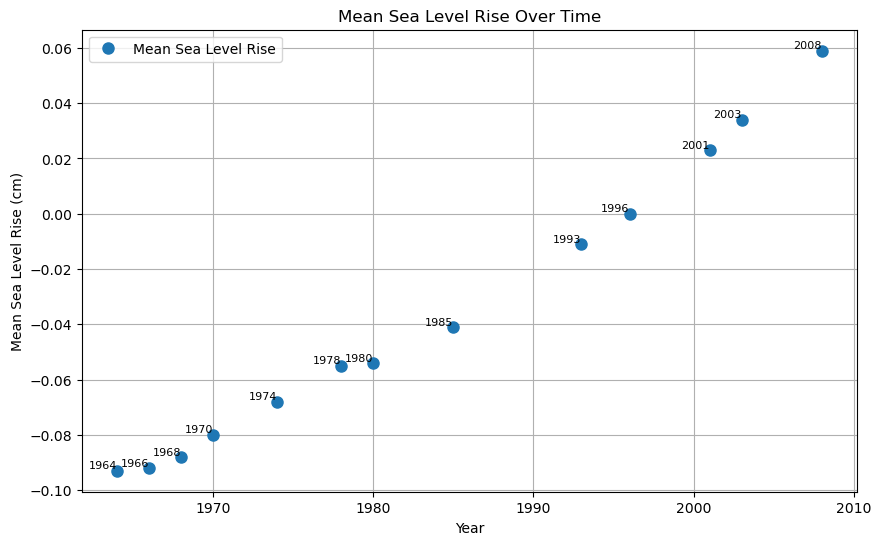

In [19]:
import matplotlib.pyplot as plt

# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(data_array[:, 0], data_array[:, 1], marker='o', linestyle='', markersize=8, label='Mean Sea Level Rise')
plt.title('Mean Sea Level Rise Over Time')
plt.xlabel('Year')
plt.ylabel('Mean Sea Level Rise (cm)')
plt.grid(True)

# Add labels for each marker
for year, sea_level in data_array:
    plt.text(year, sea_level, str(int(year)), ha='right', va='bottom', fontsize=8)

plt.legend()
plt.show()
